# Lab 1

Written by: Matthew Prinz, Jimmy Phan, Yash Parakh

## Programming Questions

### Question 1

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

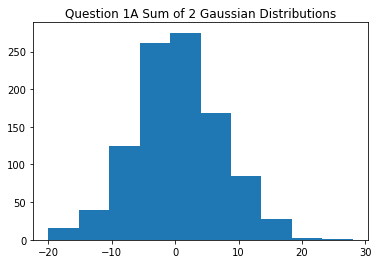

Mean = 0.45084146535740705
Variance = 46.824631076783746


In [0]:
### 1A
# Setting seed for replicability
np.random.seed(42)
mu1, sigma1 = -10, 5
mu2, sigma2 = 10, 5

# Taking samples & creating normal curve
samples1 = np.random.normal(mu1, sigma1, 1000)
samples2 = np.random.normal(mu2, sigma2, 1000)

# Getting histogram data
hist_data = samples1 + samples2

# Plotting the histogram
plt.hist(hist_data)
plt.title("Question 1A Sum of 2 Gaussian Distributions")
plt.show()

### 1B
sum_mu, sum_sigma = np.mean(hist_data), np.var(hist_data)
print("Mean =", sum_mu)
print("Variance =", sum_sigma)

1A) We recognize that the sum of these two Gaussian RVs are Gaussian.

1B) From probability, we know that we can sum the means and sum the variances to find the new mean and the new variance. Thus, I estimate the **mean as 0** and the **standard deviation as 10**.


### Question 2


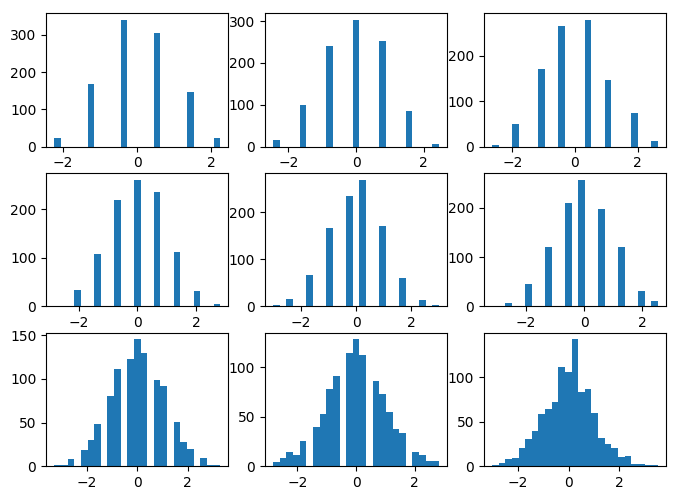

In [0]:
### 2
from scipy.stats import bernoulli
from math import ceil

p = 0.5 # Xi is iid
num_samples = 1000
draw_samples = [None] * num_samples

num_xi = [5, 6, 7, 8, 9, 10, 30, 50, 250]

figure(num=None, figsize=(8, 6), dpi=100)

for j, n in enumerate(num_xi):
  #a little bit more pythonic to use enumerate

  for i in range(num_samples):
    r = bernoulli.rvs(p, loc=0, size=n) # calculate n Xi samples
    r = 2*r - 1 # transform to {-1, 1}
    draw_samples[i] = r.sum() / np.sqrt(n)
  plt.subplot(ceil(len(num_xi)/3), 3, j+1)
  plt.hist(draw_samples, bins=25)

### Question 3

In [0]:
### 3
mu = 0
sigma = 5
num_samples = 25000
data = np.random.normal(mu, sigma, num_samples)
estimated_mean = data.sum() / num_samples
estimated_std_dev = np.sqrt(np.square(data - estimated_mean).sum() / num_samples)
print("Estimated Mean =", estimated_mean)
print("Estimated Standard Deviation =", estimated_std_dev)

Estimated Mean = -0.04618932272030812
Estimated Standard Deviation = 5.000173530018989


### Question 4

In [0]:
### 4 - should probably check this, source: 
# https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

means = [-5, 5] 
covariances = [ [20, .8], [.8, 30]]
num_samples = 10_000
x, y = np.random.multivariate_normal(means, covariances, num_samples).T
estimated_x_mean = x.sum() / num_samples
estimated_x_std_dev = np.sqrt(np.square(x - means[0]).sum() / num_samples)
estimated_y_mean = y.sum() / num_samples
estimated_y_std_dev = np.sqrt(np.square(y - means[1]).sum() / num_samples)
estimated_x_y_cov = np.sum(np.dot(x - estimated_x_mean, y - estimated_y_mean)) / num_samples # added this
print("Estimated X Mean =", estimated_x_mean)
print("Estimated X Standard Deviation =", estimated_x_std_dev)
print("Estimated Y Mean =", estimated_y_mean)
print("Estimated Y Standard Deviation =", estimated_y_std_dev)
print("Estimated X,Y Covariance =", estimated_x_y_cov)

# plt.plot(x, y, 'x')
# plt.axis('equal')
# plt.show()

Estimated X Mean = -5.014368981065408
Estimated X Standard Deviation = 4.4804157804882125
Estimated Y Mean = 4.96422340813386
Estimated Y Standard Deviation = 5.5432116086559695
Estimated X,Y Covariance = 0.4818964538694266


### Question 5

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [0]:
patient_data = pd.read_csv("PatientData.csv",header=None)
patient_data_test = patient_data
patient_data.head(100)
# patient_data.sort_values(by=2,ascending=False)
# patient_data.loc[:, [2, 3]].sort_values(by=2, ascending=False)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
5,13,0,169,51,100,167,321,174,91,107,66,52,88,?,84,0,36,48,0,0,20,0,0,0,0,0,0,20,44,36,0,0,44,0,0,0,0,0,0,24,...,-0.8,19.8,-48.4,0.0,0.0,1.6,8.7,-114.5,-72.8,2.0,0.0,31.0,-25.7,0.0,0.0,0.8,5.9,29.2,85.8,0.6,0.0,19.5,-11.4,0.0,0.0,0.8,3.3,20.1,49.1,0.0,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
6,40,1,160,52,77,129,377,133,77,77,49,75,65,?,70,0,44,0,0,0,24,0,0,0,0,0,0,0,40,32,0,0,24,0,0,0,0,0,0,0,...,0.0,3.7,-11.0,0.0,0.0,-0.5,4.1,-19.8,21.2,0.1,0.0,7.7,-6.4,0.0,0.0,0.4,1.9,1.4,15.4,0.0,0.0,7.4,-2.5,0.0,0.0,0.4,1.3,9.3,18.9,-0.4,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1
7,49,1,162,54,78,0,376,157,70,67,7,8,51,?,67,0,44,36,0,0,24,0,0,0,0,0,0,0,52,32,0,0,28,0,0,0,0,0,0,0,...,0.0,2.1,-9.0,0.0,0.0,0.6,3.8,-16.1,21.1,0.1,0.0,6.6,-4.1,0.0,0.0,0.3,1.4,4.7,14.2,-0.2,0.0,8.5,-2.7,0.0,0.0,0.1,0.8,14.5,20.9,-0.3,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1
8,44,0,168,56,84,118,354,160,63,61,69,78,66,84,64,0,40,0,0,0,20,0,0,0,0,0,0,0,44,12,0,0,28,0,0,0,0,0,0,0,...,0.0,2.4,-10.3,0.0,0.0,0.3,6.8,-19.3,43.2,0.8,0.0,7.9,-7.3,0.0,0.0,0.9,6.5,5.7,62.9,0.1,0.0,9.3,-3.8,0.0,0.0,0.8,3.8,15.1,48.5,0.1,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,1
9,50,1,167,67,89,130,383,156,73,85,34,70,71,?,63,0,44,40,0,0,28,0,0,0,0,0,0,0,56,24,0,0,32,0,0,0,0,0,0,0,...,0.0,4.3,-7.3,0.0,0.0,1.1,4.0,-8.9,27.9,-0.5,0.0,7.0,-3.2,0.0,0.0,1.1,1.3,13.2,22.3,-0.5,0.0,10.9,-2.5,0.0,0.0,1.0,1.0,23.8,29.6,-0.5,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1,10


In [0]:
patient_data.describe()

,0,1,2,3,4,5,6,7,8,9,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,...,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,5.628319,51.628319,20.920354,0.141593,0.0,30.035398,0.002212,0.011062,0.011062,0.004425,0.004425,0.008850,5.619469,54.336283,20.59292,0.433628,0.150442,31.637168,0.017699,0.028761,0.002212,0.004425,0.004425,0.015487,16.026549,41.982301,20.327434,2.300885,0.318584,30.513274,...,-0.653540,8.039602,-10.150664,0.032965,-0.013496,0.226770,3.894690,-8.269027,32.422788,0.001106,-0.297566,11.839381,-7.034513,0.025664,-0.002876,0.547788,2.535841,10.081195,33.328540,-0.285398,-0.277212,11.369912,-3.607522,0.016814,0.0,0.546681,1.722124,17.840044,32.871460,-0.302434,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,10.650001,18.249901,20.541728,1.569483,0.0,10.046393,0.047036,0.104708,0.104708,0.066445,0.066445,0.093759,11.220680,17.248213,21.06105,3.093161,2.692591,9.624951,0.132002,0.167319,0.047036,0.066445,0.066445,0.123615,21.906457,23.106034,25.365424,9.212818,3.124229,18.359850,...,3.414085,5.279719,7.066568,0.390403,0.264398,0.548988,2.990809,32.157008,37.362289,1.015566,1.758544,5.917391,5.061472,0.166763,0.046287,0.426941,2.429776,25.074695,34.361665,0.675060,0.992472,4.793656,2.850633,0.275907,0.0,0.370548,1.708190,16.445472,24.421643,0.603551,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-32.900000,0.000000,-48.400000,0.000000,-5.600000,-3.100000,-11.800000,-242.400000,-146.200000,-3.200000,-20.400000,0.000000,-42.900000,0.000000,-0.900000,-2.600000,-8.200000,-124.800000,-161.400000,-4.800000,-14.200000,0.000000,-30.800000,0.000000,0.0,-0.900000,-5.000000,-56.800000,-63.600000,-5.600000,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,0.000000,40.000000,0.000000,0.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.00000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,16.000000,...,0.000000,4.200000,-13.000000,0.000000,0.000000,0.000000,2.000000,-19.525000,9.850000,-0.500000,0.000000,7.875000,-9.100000,0.000000,0.000000,0.400000,1.100000,-0.925000,11.275000,-0.600000,0.000000,8.1

In [0]:
# Each row is a patient:
patient_data.shape

(452, 280)

5a) There are 452 patients, each with 280 features.

b) Guessing the meaning of each feature:
1.   We thought feature 0 was days in the hospital, based on the summary statistics.
2.   Feature 1 could male or female.

3.   Feature 2 could be weight, with the 780 being an anomaly.
4.   Feature 3 could be heart rate.

c) Yes, there are missing features. 




In [0]:
### 5c
# This makes sense to me, but an easier way to do this is: patient_data_test.fillna(patient_data_test.mean())
for i in range(patient_data.shape[1]):
    questions_to_nans = pd.to_numeric(patient_data[i], errors='coerce') # Makes ? == NaN
    series_to_fill = questions_to_nans.fillna(questions_to_nans.mean()) # Set NaN to mean
    patient_data[i] = series_to_fill
    patient_data

In [0]:
patient_data.isnull().values.any() # Check to see if any NaNs still present

False

To test for feature importance, we decided to use a classifier from sklearn, apply it, and see how it decided feature importance. We used a 
tree classifier.

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [0]:
### 5d
features = patient_data.iloc[:, :-1] # all features
labels = patient_data.iloc[:, -1 ]  # labels (what disease everyone has)
clf = ExtraTreesClassifier() # Make ExtraTreesClassifier
clf.fit(features, labels) # Fit data to it
importances = clf.feature_importances_ # Find importance of each feature.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
importances = list(importances)
importances_sorted = np.sort(importances)[::-1]
most_important_features = []
most_important_features.append(importances.index(importances_sorted[0]))
most_important_features.append(importances.index(importances_sorted[1]))
most_important_features.append(importances.index(importances_sorted[2]))
print(f'The most important features are: {most_important_features}')

The most important features are: [90, 14, 102]
